# IN269 Kecerdasan Bisnis
## Pertemuan 03: Forecasting

- Mari kita lihat beberapa data science tools that can help you predict the future.
- Kita akan introduce a simple business scenario in which a company needs to forecast customer demand.


- We’ll use linear regression for our forecasting, and we’ll discuss both **univariate** and **multivariate linear regression**. 
- Finally, we’ll look at extrapolation of regression lines and how to evaluate various regression models to choose the best one.

## Predicting Customer Demand
- Imagine that you’re running a car dealership in Quebec, Canada. 
- You are using a standard business model for retail: 
    - you buy cars from a manufacturer at a low price and then sell those cars to individual customers at higher prices. 
    - Every month, you need to decide how many cars you’ll order from the manufacturer. 
    - If you order too many cars, you’ll be unable to sell them all quickly, resulting in high storage costs or cash flow problems. 
    - If you order too few cars, you won’t be able to meet your customers’ demands.



- Ordering the right number of cars is important. 
- But what is the right number? 
- The answer depends on certain business considerations, such as 
    - the cash in your bank account and 
    - how much you want to grow

- In a typical month, the right number of cars to order is exactly the number of cars that customers will want to buy during the coming month. 
- Since we can’t ◊see into the future, we need to forecast the demand and place an order based on our forecast.

- Kita akan belajar how to use linear regression for forecasting. 
- Kita akan menggunakan past data to predict future data, to learn the number of cars we need to order. 
- We’ll start simply, just by reading in and looking at some data, and then proceed to the other steps of the forecasting process.

## Cleaning Erroneous Data
- Data yang akan dianalisis untuk memprediksi masa depan adalah catatan jumlah mobil yang dijual by dealerships in Quebec, Canada, for each of 108 consecutive months. 
- This data is old; the most recent month recorded is December 1968. Therefore, for this scenario, we’ll be imagining that we live in December 1968, and we’ll make forecasts for January 1969.  

Mari kita baca data kita by using Python’s pandas package:

In [1]:
import pandas as pd
carsales=pd.read_csv('carsales.csv')

- Here, we import pandas and give it the alias `pd`. 
- We then use its `read_csv()` method to read our data into Python and store it in the variable `carsales`. 
- The `pandas` package we import and use here is a powerful module that makes working with data in Python easier. 

- The `carsales` object we create is a `pandas` dataframe, which is the standard pandas format for storing data in a Python session. 
- Because the object is stored as a pandas dataframe, we’ll be able to use many helpful pandas methods to work with it,

Let’s start by using the `head()` method that enables us to inspect `pandas` dataframes:

In [2]:
carsales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


- By looking at these rows, we can notice a few important points. 
    - First, we can see the column names. 
    - The column names in this dataset are `Month` and `Monthly car sales in Quebec 1960-1968`. 
    - The second column name will be easier to work with if we shorten it.

We can do this easily in Python:

In [3]:
carsales.columns= ['month','sales']

In this snippet, we access the columns of our dataframe and redefine them to have shorter names (month and sales, respectively).

- Just as the `head()` method prints the top five rows of a dataset, the `tail()` method prints the bottom five rows. 
- If you run `print(carsales.tail())`, you’ll see the following output:

In [4]:
carsales.tail()

,month,sales
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


- We can see that the column names are shorter now and easier to read. 
- But we also see that the very last row doesn’t contain car sales data. 

- Instead, its first entry is a tag, or label, that tells us about the whole dataset. 
- Its second entry is `NaN`, which stands for _not a number_, meaning that the entry contains no data or undefined data. 
- We don’t need the label entry or the empty (`NaN`) entry, so let’s remove the entire last row (row 108):

In [5]:
carsales=carsales.loc[0:107,:].copy()

- Here, we use the pandas `loc()` method to specify a selection of rows that we want to keep: in this case, all the rows between row 0 and row 107, inclusive. 
- We use the colon (`:`) after the comma to indicate that we want to keep both of the dataset’s columns. 

- We store the result in our `carsales` variable, thereby removing the superfluous row 108. 
- If you run `print(carsales.tail())` again, you’ll see that that row has been removed.

In [6]:
carsales.tail()

,month,sales
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


- Another thing we can see by looking at the head and tail of our data is the format of the month data. 
- The first entry is `1960-01` (January of 1960), the second entry is `1960-02` (February of 1960), and so on.

- As data scientists, we’re interested in doing numeric analyses using math, statistics, and other quantitative methods. 
- Dates can present several tedious challenges that make it hard to do math and statistics the way we want to. 

- The first challenge is that dates are sometimes not stored in a numeric data type. 
- Here, the dates are stored as strings, or collections of characters.

- To see why this is an issue, try `print(1960+1)` in the Python console; you’ll notice that the result is `1961`.
- Python has seen that we’re working with two numbers, and it’s added them in the way we expect. 

- Then, try `print('1960'+'1')` in the Python console; now you get `19601` as the result. 
- Instead of adding two numbers, Python has seen that we’ve input strings and assumes that the `+` sign means that we want to do concatenation, simply fusing the strings together in a way that doesn’t follow the rules of math.

- Another challenge with dates is that even when they’re in numeric form, they follow logic that is different from the logic of natural numbers. 
- For example, if we add `1` to month `11`, we get month `12`, which follows the arithmetic rule that `11 + 1 = 12`. - But if we add `1` to month `12`, we get month `1` again (since every December is followed by January of the next year), which is not consistent with the simple arithmetic of `12 + 1 = 13`.

- In this case, the simplest way to address the issues with the data type of our date data is to define a new variable called `period`. 
- We can define it as follows:

In [7]:
carsales['period']=list(range(108))
carsales.head()

,month,sales,period
0,1960-01,6550.0,0
1,1960-02,8728.0,1
2,1960-03,12026.0,2
3,1960-04,14395.0,3
4,1960-05,14587.0,4


- Our new `period` variable is just a list of all the numbers from 0 to 107. 
- We’ll refer to January 1960 as period 0, February 1960 as period 1, and so on until December 1968, the last month in our data, which we’ll call period 107. 

- This new variable is numeric, so we can add to it, subtract from it, or do any other mathematical operation with it. 
- Also, it will follow the rules of standard arithmetic, with period 13 coming after period 12, as we expect in numeric variables. 
- This simple solution is possible because in this particular dataset, the rows are organized in chronological order, so we can be sure that each period number is being assigned to the correct month.

- These simple tasks, like adding a numeric column for months, removing an extra row, and changing column names, are part of _data cleaning_. 
- This is not a glamorous or particularly exciting process, but doing it right is extremely important because it lays a foundation for the more thrilling steps of the data science process.

## Plotting Data to Find Trends
- After these basic _data-cleaning_ tasks, we should definitely plot the data. 
- Plotting should be done early and often in every data science project. 
- Let’s use the Matplotlib module to create a simple plot of our data:

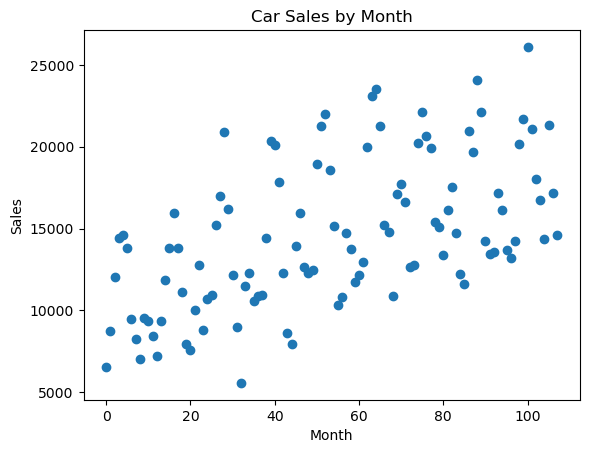

In [8]:
from matplotlib import pyplot as plt
plt.scatter(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

- In this snippet, we import the **Matplotlib** `pyplot` module and give it the alias `plt`. 
- Then, we use the `scatter()` method to create a scatterplot of all the sales numbers in our data, organized by `period` (month). 
- We also use a few lines to add axis labels and a plot title and then show the plot. 

- This simple plot shows our `period` variable on the x-axis and `sales` on the y-axis. 
- Each point represents one row of data or, in other words, the number of car sales for one particular month.

- See what interesting information pops out at you in this plot. 
- Probably the most obvious thing is the gradual upward trend from left to right: sales appear to be increasing gradually over time. 

- Other than this trend, the data seems noisy and scattered, with huge variations between one month and another. 
- The variations within a year or season look random, noisy, and unpredictable. 



- The linear regression method that we’ll implement next will attempt to capture the order and patterns in our data, and help us be less distracted by the randomness and noise.



## Performing Linear Regression
- Now that we’ve cleaned the data, plotted it, and noticed some basic patterns, we’re ready to do forecasting in earnest. 
- We’ll use linear regression for our forecasts. 
- Linear regression is an essential part of every data scientist’s toolkit: it finds a line that captures a noisy relationship between variables, and we can use that line to make predictions about things we’ve never seen.

Like all the best scientific tools, linear regression allows us to pull order from chaos.

- In this case, we have the chaos of car sales in Quebec, where seasonal variations, time trends, and plain randomness mingle together in a noisy dataset. 
- When we apply simple linear regression to this data, our output will be a straight line that captures an underlying structure that will help us make sound forecasts for the future.

<center>
    <img src="images/linear-regression.png" width="750">
</center>

- In this plot, you can see the points representing the data. 
- Again, we see the chaos of our dataset: great variations occur between months across the whole dataset.

- The dashed line that progresses slightly upward from left to right represents the **output of a linear regression**. 
- It’s called a _regression line_, and we often say that this regression line _fits_ the data. 


- In other words, it goes through what looks like roughly the center of the cloud constituted by all the points together. 
- It gets close to many of the points of our data, and no data point is particularly far away from it. It’s as if the line expresses or reveals the fundamental relationship between time and sales (a relationship of gradual growth). 


- The notion of a line fitting a set of points is fundamental to linear regression. 
- In fact, for reasons we’ll discuss later, a regression line is sometimes called the _line of best fit_ to a dataset.

- Let’s run the code that performs linear regression and outputs a regression line. 
- We’ll use methods for linear regression that are very particular about the shape of the data we use, meaning whether sales numbers are stored as $108$ rows $\times 1$ column or $108$ columns $\times 1$ row. 
- In this case, our linear regression code will run more smoothly if our data is stored as 108 rows of 1 list each, where each list contains one number. 
- To get our data in this shape, we’ll use the _pandas_ `reshape()` method as follows:

In [9]:
x = carsales['period'].values.reshape(-1,1)
y = carsales['sales'].values.reshape(-1,1)

In [10]:
print(x)
print(y)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]]
[[ 6550.]
 [ 8728.]
 [12026.]
 [14395.]
 [14587.]
 [13791.]
 [ 9498.]
 [ 8251.]
 [ 7049.]
 [ 9545.]
 [ 9364.]
 [ 8456.]
 [ 7237.]
 [ 9374.]
 [11837.]
 [13784.]
 [15926.]
 [13821.]
 [11143.]
 [ 7975.]
 [ 7610.]
 [10015.]
 [12759.]
 [ 8816.]
 [1

- If you run `print(x)` and `print(y)`, you can see the new shape of the data: 108 rows of one-element lists. 
- Actually performing the linear regression takes little code. 
- We can do the whole thing, including importing the relevant module, with three lines:

In [23]:
# AKTIVITAS -----------------------------------------------------------------------------------------------------------------
import numpy as np
data = np.array([[38,24],[34,22],[40,27],[46,32],[43,30],[48,31],[60,27],[55,26],[52,28]])
print(data)

[[38 24]
 [34 22]
 [40 27]
 [46 32]
 [43 30]
 [48 31]
 [60 27]
 [55 26]
 [52 28]]


In [24]:
xa = data[:, 0]
ya = data[:, 1]

In [25]:
ma, ba = np.polyfit(xa, ya, 1)

In [26]:
print(ma)
print(ba)

0.13889972688255905
21.02419040187282


Slope (m): 0.13889972688255905
Intercept (b): 21.02419040187282
Equation: y = 0.14x + 21.02


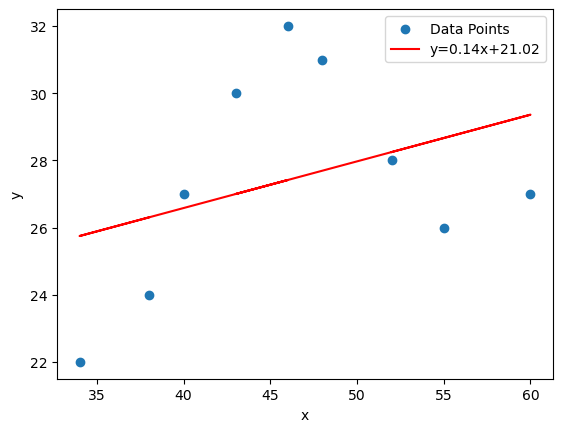

In [27]:
print(f"Slope (m): {ma}")
print(f"Intercept (b): {ba}")
print(f"Equation: y = {ma:.2f}x + {ba:.2f}")

# plot
plt.scatter(xa, ya, label="Data Points")
plt.plot(xa, ma*xa + ba, color="red", label=f"y={ma:.2f}x+{ba:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [28]:
reglin = [0.14 * i + 21.02 for i in xa]

error1 = [(xa - ya) for xa, ya in zip(reglin, ya)]

print(error1)

[2.34, 3.780000000000001, -0.379999999999999, -4.539999999999999, -2.960000000000001, -3.259999999999998, 2.4200000000000017, 2.719999999999999, 0.3000000000000007]


In [29]:
import numpy as np

def get_mae(line, actual):
    error = [(xa-ya) for xa, ya in zip(line, actual)]
    errorabs = [abs(value) for value in error]
    mae = np.mean(errorabs)
    return mae

def get_rmse(line, actual):
    error = [(xa-ya) for xa, ya in zip(line, actual)]
    errorsquared = [value**2 for value in error]
    rmse = np.sqrt(np.mean(errorsquared))
    return rmse

# hitung error untuk reglin dan hyplin
mae1 = get_mae(reglin, ya)

rmse1 = get_rmse(reglin, ya)

print("Regression Line:")
print("  MAE  =", mae1)
print("  RMSE =", rmse1)


Regression Line:
  MAE  = 2.522222222222222
  RMSE = 2.852951687872287


Persamaan garis linear regresinya:
    
$$
    \text{Y} = 0.14 \times \text{X} + 21.02
$$

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Here, we import the linear regression capability from the scikit-learn package, which can be referred to by its standard abbreviation, `sklearn`. 
- This package, which is extremely popular in the machine learning world, provides many useful machine learning capabilities, including linear regression. 

- After importing `sklearn`, we define the variable _regressor_. 
- A _regressor_, as its name tautologically suggests, is a Python object that we’ll use to perform regression. 
- After creating the _regressor_, we tell it to fit our `x` and `y` variables. 
- We are telling it to calculate the line shown in Figure before that fits the data by matching its location and general trend.

- A more quantitative way to describe what fitting our regression means is that it’s determining precise, optimized values for two numbers: a **coefficient** and an **intercept**. 
- After running the preceding snippet, we can look at both of these numbers as follows:



In [31]:
print(regressor.coef_)
print(regressor.intercept_)

[[81.20250174]]
[10250.77726809]


- This code prints out two numbers that are output by the regressor’s `fit()` method: 
    - an intercept, which you should see is about 10,250.8; 
    - and a variable called `coef_`, which is short for _coefficients_, and should be equal to about 81.2. 
- Together, these two numbers specify the exact position and trend of the dashed regression line you see in figure.

<center>
    <img src="images/linear-regression-formula.jpg" width="800">
</center>
<ul>
<li>Manakah yang merupakan <b>coefficient</b> atau koefisien?</li>
<li>Manakah yang merupakan <b>intercept</b>?</li>    
</ul> 

So, what we have learned from our regression process is that the relationship between time period and car sales can be expressed, at least approximately, as follows:    
    
$$
    \text{car sales} = 81.2 \times \text{period} + 10250.8
$$

- The chaos of the car sales dataset’s apparently random variation is now reduced to the order of this simple equation. 
- The line that this equation describes is the dashed line. 
- We can think of every point on that line as a prediction of how many car sales are expected at each time period, ignoring the distracting randomness and noise.

- The $m$ and $b$ values in our equation have useful interpretations. 
- The interpretation of the line’s **slope**, $81.2$, is the monthly growth trend of car sales. 
- Based on the data we’ve observed in the past, we conclude that _car sales in Quebec grow by about 81.2 cars per month._
- Randomness and other variation remain, but a growth of $81.2$ is what we approximately expect.

- The interpretation of the intercept variable, $10250.8$, is the _baseline value of car sales_: 
    - **the expected car sales** in month 0 after “removing” or ignoring the chaos of seasonal variation, the passage of time, and other influences.

- The equation that linear regression finds can also be called **a model**, a quantitative description of how two or more variables relate to each other. 
- So when we perform the preceding steps, we can say that we _fit a regression_, or equivalently we can say that **we trained a model**.
- Our regression, or equivalently our model, tells us that we expect to sell about $10250.8$ cars at the beginning of the time frame in our data, and we expect to sell about $81.2$ more cars every month than we sold in the previous month.

It’s natural to wonder how our regressor determined that $81.2$ and $10250.8$ (the `coef_` and `intercept` outputs of our regressor) are the best values for $m$ and $b$ in our regression line. 

- A literally infinite number of conceivable lines also go through our cloud and could be said to fit our data. 
- For example, we might hypothesize that the following line is a better approximation of the relationship between time period and sales:    
   
$$
    \text{car sales} = 125 \times \text{period} + 8000
$$

- Let’s call this new line our _hypothesized line_. 
- If we use it as a model of our data, we have a new $m$ and $b$, and so we have a new interpretation. 
- In particular, the slope of this line is $125$, which we would interpret as an expectation that monthly car sales will increase by about $125$ every month $\Rightarrow$ significantly higher than $81.2$, the estimate from our regression line. 

Let’s plot our regression line and this new hypothesized line together with the data as follows:

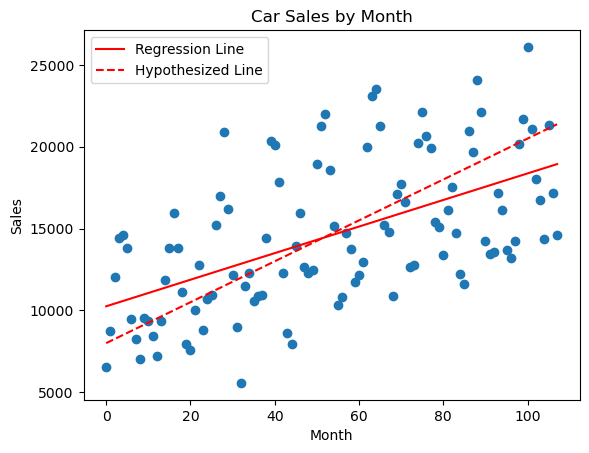

In [32]:
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(carsales['period'],[81.2 * i + 10250.8 for i in \
                             carsales['period']],'r-',label='Regression Line')
plt.plot(carsales['period'],[125 * i + 8000 for i in
                             carsales['period']],'r--',label='Hypothesized Line')
plt.legend(loc="upper left")
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

You can see the output of this snippet in the figure, where we’ve drawn the data, our regression line (the shallow solid line), and our new hypothesized line (the steeper dashed line).

- Both lines go through our cloud of points. 
- Both show an upward trend over time. 
- Both are reasonable candidates to be approximations of the relationship between time and sales, and both could be said to fit the data. 

- Why has our regressor output one line instead of the other? 
- We said that the regression line output by the linear regression process is the **line of best fit**. 
- What is it that enables us to say that it fits better than any other line?

### Calculating Error Measurements
- We can find the answer by looking at measurements related to regression errors. 
- Remember that we interpret each point of a regression line as our prediction of what value we expect in the data. 

<center>
    <img src="images/regression-error.png" width="750">
</center>
<center>
Regression errors: vertical distances between points and a regression line</center>

- You can see that this regression line is a good fit to the data, meaning it gets close to most of the illustrated points. 
- However, it’s **not** a perfect fit. 

- For every data point, we can calculate the vertical distance between the data point and the regression line. 
- The regression line predicts a certain value, and the point in the data has a particular distance from that prediction. 
- This distance between a predicted and an actual value of a data point is called the regression’s _error_ relative to that point. 
- In the figure, the variable $e_i$ is an error measurement for one of the points in the data. 


- You can see that $e_i$ is the vertical distance between a particular point and the regression line. 
- We can calculate this distance for every point in our data.

- Calculating the error relative to each data point will give us a way to quantify how well any line fits our data.
    - Lines with low errors fit the data well, and 
    - lines with high errors fit the data poorly. 
- That’s why we say that _measuring regression errors is one way to measure a regression line’s goodness of fit_, the degree to which a line fits the data well.

- Let’s calculate those error measurements for our car sales regression. 
- We’ll calculate each point of the lines we’re interested in and compare those points to each point of our dataset:

In [33]:
saleslist=carsales['sales'].tolist()
regressionline=[81.2 * i + 10250.8 for i in carsales['period']]
hypothesizedline=[125 * i + 8000 for i in carsales['period']]
error1=[(x-y) for x, y in zip(regressionline,saleslist)]
error2=[(x-y) for x, y in zip(hypothesizedline,saleslist)]

- In this snippet, we create `saleslist`, a variable that includes the raw car sales numbers for every month. 
- Then we create two variables, `regressionline` and `hypothesizedline`. 

- These variables record every point on the regression and hypothesized lines, respectively. 
- We want to measure how far each true sales number is from both of these lines, so we create two more variables:  
    - `error1` to record the distance between true sales numbers and the regression line, and 
    - `error2` to record the distance between true sales numbers and the hypothesized line.

We can print out these variables to look at what errors we find for both of our lines:


In [34]:
print(error1)
print(error2)

[3700.7999999999993, 1604.0, -1612.800000000001, -3900.6000000000004, -4011.4000000000015, -3134.2000000000007, 1240.0, 2568.199999999999, 3851.3999999999996, 1436.5999999999985, 1698.7999999999993, 2688.0, 3988.199999999999, 1932.3999999999996, -449.40000000000146, -2315.2000000000007, -4376.0, -2189.800000000001, 569.3999999999996, 3818.5999999999985, 4264.799999999999, 1941.0, -721.8000000000011, 3302.3999999999996, 1522.5999999999985, 1333.7999999999993, -2838.0, -4566.800000000001, -8375.6, -3599.4000000000015, 543.7999999999993, 3771.0, 7281.199999999999, 1456.3999999999996, 755.5999999999985, 2509.7999999999993, 2312.0, 2290.199999999999, -1068.6000000000004, -6961.4000000000015, -6629.200000000001, -4236.0, 1393.199999999999, 5100.4, 5861.5999999999985, -27.200000000000728, -1950.0, 1439.199999999999, 1881.3999999999996, 1759.5999999999985, -4633.200000000001, -6867.0, -7541.799999999999, -4026.6000000000004, -539.4000000000015, 4410.799999999999, 4006.0, 127.20000000000073, 12

- When you look at these lists of errors, you can see 108 separate measurements of how far these lines are from the raw data. 
- These 108 measurements are an expression of how well these lines fit the raw data. 
- However, looking at all 216 of these measurements at once is difficult. 
- It would be easier if we could boil down all this information indicating how well a line fits to just one number. 

The following snippet shows one way to do this:

In [35]:
import numpy as np

error1abs=[abs(value) for value in error1]
error2abs=[abs(value) for value in error2]

print(np.mean(error1abs))
print(np.mean(error2abs))

3154.3592592592595
3239.777777777778


- In this snippet, we import Python’s NumPy package. 
- NumPy is used often in data science, especially for calculations with arrays and matrices. 
- Here, we import it because it gives us the ability to find the mean of a list. 
- Then we define two new variables: `error1abs` and `error2abs`, each containing a list of the absolute values of our error measurements for our two respective lines. 
- Finally, we take the means of these lists.

- The means that we find are called the _mean absolute error_ (MAE) measurements of each line. 
- Hopefully, the MAE feels like an intuitive measurement of error to you: it’s just the average vertical distance between a line and the points in a dataset. 
    - A line that gets very close to the points in a dataset will have a low MAE, and 
    - a line that is very far from most points will have a higher MAE.

- The MAE is a reasonable way to express the degree of goodness of fit of a regression line or any other line. 
- The lower the MAE, the better. 
- In this case, we can see that the MAE for our regression line is $3154.4$, while the MAE for our hypothesized line is $3239.8$. 
- At least according to this measurement, the regression line fits the data better than our hypothesized line.

- The MAE has an easy interpretation: it’s the _average error_ we expect to have if we use a particular line for prediction. 
- When we say that the MAE for our regression line is $3154.4$, we mean that if we use this regression line to make predictions, we expect our predictions to be wrong by about $3154.4$ on average (either $3154.4$ too low or too high).

MAE is not the only measurement that indicates how well a line fits a dataset. Let’s look at another possible measurement:

In [36]:
error1squared=[(value)**2 for value in error1]
error2squared=[(value)**2 for value in error2]

print(np.sqrt(np.mean(error1squared)))
print(np.sqrt(np.mean(error2squared)))

3725.491219512759
3968.900519455399


- Here, we create lists of the squared values of each error. 
- Then we take the square root of the sum of these errors. 
- This measurement is called the _root mean squared error_ (RMSE). 
- Lower RMSE values indicate a line that is a better fit $\Rightarrow$ one that’s expected to make better predictions.

We can create simple Python functions that perform calculations of MAE and RMSE:

In [37]:
def get_mae(line,actual):
    error=[(x-y) for x,y in zip(line,actual)]
    errorabs=[abs(value) for value in error]
    mae=np.mean(errorabs)
    return mae

def get_rmse(line,actual):
    error=[(x-y) for x,y in zip(line,actual)]
    errorsquared=[(value)**2 for value in error]
    rmse=np.sqrt(np.mean(errorsquared))
    return rmse

- These functions just calculate MAE and RMSE, respectively, exactly as we did previously. 
- If you run `print(get_rmse(regressionline,saleslist))`, you can see that the RMSE of our regression line is about `3725`, and if you run `print(get_rmse(hypothesizedline,saleslist))`, you can see that the RMSE of our hypothesized line is about `3969`.

- You’ll notice that the RMSE of our regression line is **smaller** than the RMSE of our hypothesized line. 
- This enables us to say that the regression line is a better fit to the data than the hypothesized line, according to the RMSE metric.

- It’s not a coincidence that our regression line has a lower RMSE than our hypothesized line. 
- When we ran the command `regressor.fit(x,y)` in Python earlier, the `regressor.fit()` method performed linear algebraic calculations that were invented by the great mathematician Adrien-Marie Legendre and first published in 1805. 

- Legendre’s calculations take a collection of points as an input, and their output is the intercept and coefficients that minimize the value of the RMSE. 
- In other words, the line whose coefficients are determined by Legendre’s method is mathematically guaranteed to have **a lower RMSE than any of the other infinite possible lines that we could draw to try to fit our data**. 
- When _we call the regression line the line of best fit_, we mean that **it is mathematically guaranteed to have the lowest possible RMSE of all possible lines that use the variables we specified**. 

- The line that the regressor outputs is <u>the best-fit line</u>, not just in the loose sense that it looks like it fits the cloud very well, but in the strict quantitative sense that out of all the infinite lines that go through the cloud of points, it is guaranteed to have <u>the lowest RMSE</u>. 
- You can feel free to try other straight lines and check their RMSE values $\Rightarrow$ you won’t find one that performs better than our regression line.



## Using Regression to Forecast Future Trends
- So far, we’ve used linear regression to find the line that is the best fit of our historical data. 
- But our historical data is all from the past, so we haven’t done any real forecasting yet. 
- Going from a linear regression to a forecast is simple: <u>we just need to extrapolate</u>.

- The dashed regression line we drew in the Figure stops at the edges of our plot, at month 0 on the left and month 107 on the right, but there’s no reason it needs to stop there. 
- If we continue to draw our regression line farther to the right, we can see the values we expect for any month, however far in the future. 
- Of course, we’ll keep the same slope and intercept as we extend the line in this way.

Let’s write code that will do this:

In [38]:
x_extended = np.append(carsales['period'], np.arange(108, 116))

In [39]:
# buat dataframe periode baru
X_future = pd.DataFrame({'period': list(range(108, 116))})

# prediksi penjualan
y_pred = regressor.predict(X_future)
print("Prediksi sales periode 108-115:")
print(y_pred)

Prediksi sales periode 108-115:
[[19020.64745587]
 [19101.84995761]
 [19183.05245934]
 [19264.25496108]
 [19345.45746282]
 [19426.65996456]
 [19507.8624663 ]
 [19589.06496804]]


C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# prediksi untuk data training
y_pred_train = regressor.predict(x)

# hitung MAE & MSE pada training set
mae = mean_absolute_error(y, y_pred_train)
mse = mean_squared_error(y, y_pred_train)

print("MAE:", mae)
print("MSE:", mse)

MAE: 3154.377291328597
MSE: 13879284.808238056


- Here, we create the variable `x_extended`. 
- This variable is a combination of two sets of numbers. 
     - First, it includes the values of our dataset’s period column that records the periods from 0 to 107 in order.
     - Second, it includes all the numbers 108 through 115 in order—these are meant to represent future months after the end of our data (month 108, month 109, . . . all the way to month 115). 
- We combine these two things by using the `np.append()` method, and the end result is an extended version of our original x variable.

Next, we can use our regressor’s `predict` method to calculate the values that will be on our regression line for each of the month numbers in `x_extended`:

In [41]:
x_extended=x_extended.reshape(-1,1)
extended_prediction=regressor.predict(x_extended)

- Now we have the forecast values stored in the variable `extended_prediction`. 
- If you look at `extended_prediction`, you can see what these predictions are. 

- These predictions follow a simple pattern: <u>each is about 81.2 higher than the previous one</u>. 
- This is because 81.2 is the slope of our regression line. Remember, 81.2 is not just the slope of the line but also the size of the increase we expect in car sales every month, ignoring randomness and seasonal variation.

- The prediction method we used here is helpful, but we don’t really need it. 
- We can get any values we want on our regression line just by plugging in numbers to our regression equation:   
   
$$
    \text{car sales} = 81.2 \times \text{period} + 10250.8
$$

However we get the next predicted values, we can plot them and see what they look like on a graph 

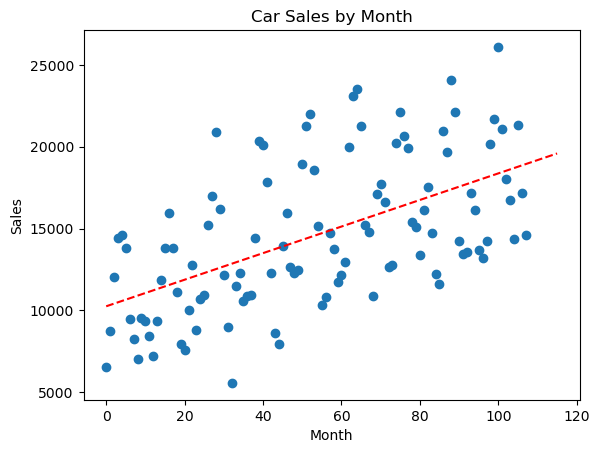

In [42]:
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x_extended,extended_prediction,'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

- This plot will probably not surprise you. 
- It looks almost identical to the Figure before, and it’s supposed to. 
- The only difference is that <u>we’ve extended our regression line out a few more periods to the right</u>, to see what car sales we expect $\Rightarrow$ that is, how many we forecast in the near future. 
- This <u>extrapolation of a regression line</u> is a simple but effective way to forecast.

## Trying More Regression Models
- The linear regression we did in the previous sections is a simple kind called **univariate linear regression**.
- This type of regression uses <u>only one variable</u> to predict one other variable. 

- In our case, we used the <u>period variable alone</u> to predict sales. 
- Using only one variable has a couple of advantages: 
    - first, it is easy; 
    - and second, it creates a simple, straight line that expresses some order in the data without also including its random noise. 

### Multivariate Linear Regression to Predict Sales
- If we use other variables to predict sales as well as just the period, we can perform a more complex kind of regression called <u>multivariate linear regression</u>.
- The details of multivariate linear regression are essentially the same as univariate linear regression; the only real difference is <u>the number of variables we use for prediction</u>. 


We can use any variables we like for multivariate regression: gross domestic product (GDP) growth rates, population estimates, car prices, inflation rates, or anything else we wan

- For now, we’re limited because our dataset doesn’t contain any of those variables. 
- It contains only **the period** and **the sales**. 
- However, we can still perform multivariate regression, by using variables that we derive from the `period` variable. 
- For example, we could use $\text{period}^2$ as a new variable in a multivariate regression, or $\log(\text{period})$, or any other mathematical transformation of the period variable.

- When we use multiple variables to predict car sales, we’re also finding **slope** and **intercept** variables. 
- The only difference is that we’re also finding <u>more variables</u>. 
- If we’re using three variables to do prediction (which we can call $x_1$, $x_2$, and $x_3$), then we’re finding the $m_1$, $m_2$, $m_3$, and $b$ variables in the following equation:   
   
$$
    y = m_1 \cdot x_1 + m_2 \cdot x_2 + m_3 \cdot x_3 + b 
$$



- The idea is the same as in univariate regression, but we end up with <u>more slopes</u> for more predictor variables. 
- If we want to use $\text{period}$, $\text{period}^2$, and $\text{period}^3$ to predict car sales in our regression, we’ll need to estimate the $m_1$, $m_2$, $m_3$, and $b$ variables in Equation    
    
$$
    \text{car sales} = m_1 \cdot \text{period} + m_2 \cdot \text{period}^2 + m_3 \cdot \text{period}^3 + b
$$

Let’s look at the code that will create these transformations of our period variable and do linear regression with three variables:

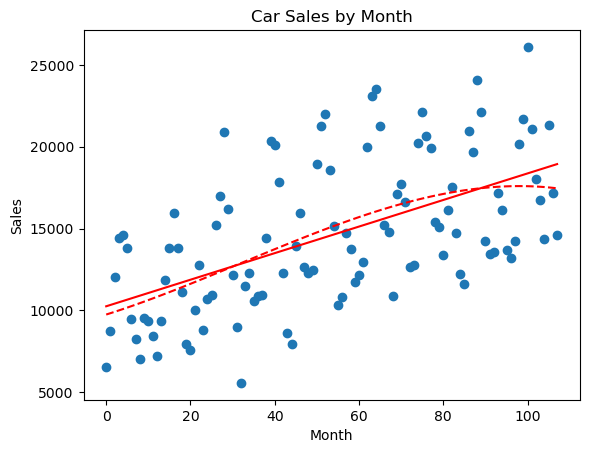

In [43]:
carsales['quadratic']=carsales['period'].apply(lambda x: x**2)
carsales['cubic']=carsales['period'].apply(lambda x: x**3)

x3 = carsales.loc[:,['period','quadratic','cubic']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x3, y)
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x,regressor.predict(x),'r-')
plt.plot(x,regressor_cubic.predict(x3),'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

- In this snippet, we define two new variables: `quadratic`, whose value is equal to $\text{period}^2$, and `cubic`, whose value is equal to $\text{period}^3$. 
- Then, we define a new `x3` dataframe that includes all three of these new variables, and we reshape it so that they will be the right shape for our regressor. 

- The right shape for this three-variable multivariate regression is an array of 108 rows, in which each row is a list of the values of our three variables for a particular month. 
- As long as the data is in the right shape, we can use the `fit()` method for any univariate or multivariate linear regression with any number of variables. 
- After calling `fit()`, we calculate the values predicted by this regression for our data and plot them.

- Here, you can see two regression lines. 
- One is the (solid) straight line that is the result of our previous (univariate) regression. 
- The other, newer regression line is not a straight line, but rather a (dashed) curve—a cubic curve, to be precise.
- Linear regression was originally designed to work with straight lines (hence the name linear), but we can also use it to find best-fit curves and nonlinear functions like the cubic polynomial

- Whether we find a best-fit straight line or a best-fit curve, the linear regression methods that we’re using are exactly the same. 
- Similarly, using multiple variables for prediction is not really different from univariate regression with one variable: the output still fits our data, and in fact, our new curve goes very close to the straight line. 
- Every time we select different variables for our regression, the output will look a little different: it may have a different shape or a different curve. 
- But it will always fit the data. 
- In this case, if you want to know the unknown variables in Equation above, we can print them out as follows:

In [44]:
print(regressor_cubic.coef_)
print(regressor_cubic.intercept_)

[[ 8.13410634e+01  7.90279561e-01 -8.19451188e-03]]
[9746.41276055]


In [45]:
print(get_mae(regressor_cubic.predict(x3),y))
print(get_mae(regressor.predict(x),y))

3121.1111554321647
3154.377291328597


In [46]:
print(get_rmse(regressor_cubic.predict(x3),y))
print(get_rmse(regressor.predict(x),y))

3692.3009291863746
3725.4912170394464


These outputs enable us to fill in all the variables to get an equation for estimating car sales using a cubic polynomial of the period:   
   
$$
    \text{car sales} = 81.34 \cdot \text{period} + 0.79 \cdot \text{period}^2 - 0.008 \cdot \text{period}^3 + 9746.41
$$   

- One important thing to notice about the Figure is the different behavior of our regression lines during the last few periods, on the right side of the plot. 
- The straight line from our univariate regression increases by about 81.2 every period, and when we extrapolate it farther to the right, it will continue to predict increases of about 81.2 every period. 

- By contrast, the curved line from our multivariate regression begins to curve downward on the right side of the plot. 
- If we extrapolated it farther to the right, it would predict a decrease in car sales every month forever.

These two lines, though they behave similarly and are both the result of linear regression, make opposite predictions about the future: one predicts growth, and the other predicts contraction. 

### Trigonometry to Capture Variations
- There’s no limit to the number of variables we can add to a multivariate regression. 
- Each selection of variables will lead to a curve with a slightly different shape. 
- One of the difficult choices we have to make in every regression problem is which variables to add to the regression

- In this case, the univariate regression line (the straight line) and the cubic regression line (the curved line) are both acceptable and can be used to forecast the future. 
- However, though they both pass through what looks like the middle of our cloud of points, there is so much variation that they don’t capture $\Rightarrow$ sales for many individual months are much higher or much lower than these lines. 


- Ideally, we could find a collection of variables that, when fit using a linear regression, lead to a curve that better fits some of this variation. 
- In this case, making one small change to the way we plot our data can make what we should do next clearer.

Let’s change the Figure from a scatterplot to a line plot, by making just one small change in our code (shown in bold):

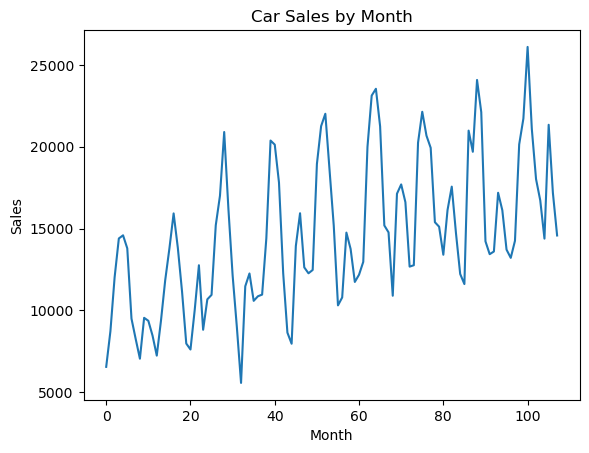

In [47]:
from matplotlib import pyplot as plt
plt.plot(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

- This new plot shows the same data, but plotted as a line rather than a collection of points. 
- With a line plot, another pattern becomes much clearer. 
- We can see that the noisy ups and downs of monthly sales within individual years are more ordered than they looked in the scatterplot.

- In particular, our data includes nine years of sales figures, and exactly **nine major peaks** are apparent in the contour of the line plot. 
- What looked like totally random noise actually has some structure: <u>a predictable peak in sales occurs every summer</u>, with <u>a corresponding trough every winter</u>. 

- If you think about it a little more, you might realize why variation could exist within a year: 
    - it’s because this data comes from Quebec, where very cold winters are associated with lower activity levels, and 
    - beautiful warm summers are associated with going outside and shopping and taking long road trips that require cars.

- Now that you can see the way the number of car sales goes up and down during a year, maybe it reminds you of a mathematical function. 
- In fact, the pattern of periodic increases and decreases looks like a **trigonometric curve**, like <u>a sine</u> or <u>cosine curve</u>.

<center>
    <img src="images/sine-cosine.png" width="750">
</center>
<center>

Let’s try a regression that uses the sine and cosine of the period in a multivariate regression:

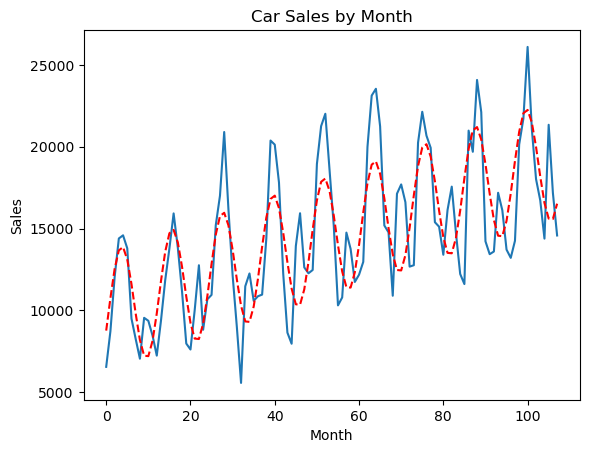

In [48]:
import math
carsales['sin_period']=carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
carsales['cos_period']=carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))



# carsales['sin_period']=carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
# carsales['cos_period']=carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))

x_trig = carsales.loc[:,['period','sin_period','cos_period']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig, y)

plt.plot(carsales['period'],carsales['sales'])
plt.plot(x,regressor_trig.predict(x_trig),'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')

plt.show()

In this snippet, we define sine and cosine transformations of the `period` variable, and then we fit a regression that uses these new variables as predictors. 

- In the Figure, you can see the raw sales data plotted as a solid line, and the trigonometric regression curve plotted as a dashed line. 
- You can see that we’re really getting somewhere now. 
- The regression that relies on trigonometric functions seems to fit the data especially well. 

- In particular, it seems to go up during the yearly peaks and down during the yearly troughs, thereby getting much closer to the true sales numbers. 
- We can verify that this trigonometric curve has a lower RMSE than the straight line as follows:

In [49]:
trig_line=regressor_trig.predict(x_trig)[:, 0]
print(get_rmse(trig_line,saleslist))

2680.5520744410464


- The RMSE we get as output is the lowest one we’ve seen yet: about $2681$. 
- It is not entirely a coincidence that trigonometric functions enable us to fit the data well. 
- In fact, the increases and decreases in temperature during seasons on our planet are due to a change in the angle of the Earth during its revolution around the sun. 
- The change in the angle of the Earth with respect to the sun follows a curve that’s like a sine curve, and therefore temperature changes throughout each year also follow sine-like curves. 
- If car sales are reacting to winter and summer weather changes due to temperature, it makes sense that they would also follow sine-like curves. 

## Choosing the Best Regression to Use for Forecasting
- We’ve observed that the regression line that includes terms for the sine and cosine of the period seem to fit the data well. 
- When we say that this line fits the data well, we mean that, qualitatively, the dashed line in the Figure gets quite close to the solid line. 
- More precisely, we mean that quantitatively, the RMSE for the trigonometric line is lower than the RMSE for the other lines we’ve looked at. 
- Whenever we find a model with a lower RMSE, we are getting a model that fits our data better.

- The natural temptation is to keep looking for new regression specifications that have lower and lower RMSEs. 
- For example, let’s try a new regression specification that includes seven prediction terms to forecast sales, and find the RMSE for that model:

In [50]:
carsales['squareroot']=carsales['period'].apply(lambda x: x**0.5)
carsales['exponent15']=carsales['period'].apply(lambda x: x**1.5)
carsales['log']=carsales['period'].apply(lambda x: math.log(x+1))

x_complex = carsales.loc[:,['period','log','sin_period','cos_period', \
                            'squareroot','exponent15','log','quadratic', 'cubic']].values.reshape(-1,9)
y = carsales['sales'].values.reshape(-1,1)

regressor_complex = LinearRegression()
regressor_complex.fit(x_complex,y)

complex_line=[prediction for sublist in regressor_complex.predict(x_complex) \
              for prediction in sublist]
print(get_rmse(complex_line,saleslist))

2610.393812297883


- In this snippet, we repeated steps that we’ve done before: define some variables, use the variables in a linear regression, and check the RMSE of the regression.
- At the end of the preceding snippet, we check the RMSE for this new regression model, and we find that it’s about 2,610: even lower than the RMSE for the trigonometric model.

If RMSE is our metric for judging how well a model fits, and we have gotten the lowest RMSE yet, it probably seems natural to conclude that this is our best model yet, and we should use this model for forecasting.

> _But be careful; apakah kesimpulan ini benar?_ TIDAKK


- The approach we’ve been taking to model selection has a problem: 
    - it doesn’t fully resemble the reality of forecasting as we encounter it in real life. 
- Think about what we’ve done. 
- We’ve used past data to fit a regression line and then judged how good that regression line is, based on how close it gets to past data points (its RMSE). 
- We’re using the past both for fitting our regression line and for judging its performance. 

- In a real-world forecasting scenario, we’ll use the past to fit our regression line, but we should use the future for judging its performance. 
> _A forecasting method is worthwhile only if it can predict the unknown future._

- When we’re choosing the best regression line to use for forecasting, we want to find a way to evaluate various regression lines based on their performance on future data. 
- This is not possible because the future hasn’t happened yet, so we can’t ever have future data. 
- But we can make a small change in the way we perform and evaluate regressions so that our measurements of performance on past data give a good estimate of how they’ll perform when predicting the future.

- What we need to do is split our full dataset into two separate, mutually exclusive subsets: 
    - a training set, consisting of the majority of our data, and 
    - a test set, consisting of the rest. 
- We’ll use only the training set to fit our regressions, or in other words, to train them. 
- After fitting/training our regressions, we’ll use the test set to evaluate how good the regressions are, using metrics like RMSE or MAE.

Let’s look at the code to accomplish this training/test split, and then we’ll see what makes it work so well:

In [51]:
x_complex_train = carsales.loc[0:80,['period','log','sin_period','cos_period','squareroot', \
                                     'exponent15','log','quadratic','cubic']].values.reshape(-1,9)
y_train = carsales.loc[0:80,'sales'].values.reshape(-1,1)

x_complex_test = carsales.loc[81:107,['period','log','sin_period','cos_period','squareroot', \
                                      'exponent15','log','quadratic','cubic']].values.reshape(-1,9)
y_test = carsales.loc[81:107,'sales'].values.reshape(-1,1)

regressor_complex.fit(x_complex_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Here, we split the data into two sets: 
    - a training set and 
    - a test set. 
- We use the training set to train the data (to fit a regression line). 
- We can then use the test set to test how well our regression performs. 

- If you think about this approach, it resembles an actual forecasting situation: 
> _we train a model knowing only the past, but the model has to do well on data that wasn’t used to train it (the future, or data that’s as if it’s from the future). Creating a test set like this is essentially creating a simulated future._

- In the preceding snippet, we use the first 81 time periods as our training data and the rest (27 time periods) as our test data. 
- In percentage terms, we use 75 percent of our data for training and reserve about 25 percent for testing. 
- Splitting training and test data in proportions close to this is common: 70 percent training data and 30 percent testing data is also common, as are 80/20 and 90/10 splits. 


- We usually keep the large majority of our data in the training set since finding the right regression line is crucial, and using more data for training can help us find the best regression line (the one with the most predictive accuracy). 
- At the same time, we need more than a negligible amount of data in the test set, since we also need to get an accurate estimate of how our regression is expected to perform with new data.

- After we’ve created training and test sets, we can test our different regression models on the test set and check the RMSE or the MAE for each model. 
- The model that has the lowest RMSE or MAE on the test set is a reasonable choice for the model we can use for forecasts of the actual future. 

Let’s check the RMSE for several of the regressions we’ve run so far:

In [52]:
x_train = carsales.loc[0:80,['period']].values.reshape(-1,1)
x_test = carsales.loc[81:107,['period']].values.reshape(-1,1)
x_trig_train = carsales.loc[0:80,['period','sin_period','cos_period']].values.reshape(-1,3)
x_trig_test = carsales.loc[81:107,['period','sin_period','cos_period']].values.reshape(-1,3)

regressor.fit(x_train, y_train)
regressor_trig.fit(x_trig_train, y_train)

complex_test_predictions=[prediction for sublist in \
                          regressor_complex.predict(x_complex_test) for prediction in sublist]
test_predictions=[prediction for sublist in regressor.predict(x_test) for \
                  prediction in sublist]
trig_test_predictions=[prediction for sublist in \
                       regressor_trig.predict(x_trig_test) for prediction in sublist]

print(get_rmse(test_predictions,saleslist[81:107]))
print(get_rmse(trig_test_predictions,saleslist[81:107]))
print(get_rmse(complex_test_predictions,saleslist[81:107]))

4115.614379193305
3461.082329259937
6006.013164270394


- After you run the preceding snippet, you can see that our univariate regression has an RMSE of about $4116$ on the test set. 
- The trigonometric multivariate regression has an RMSE of about $3461$ $\Rightarrow$ much better than the univariate regression. 
- By contrast, the complex regression model that includes nine prediction terms has an RMSE of about $6006$ on the test set $\Rightarrow$ an awful performance. 
- Though it had excellent performance on the training set, we find that it has awful performance on the test set.

- This complex model shows a particularly bad example of **overfitting**. 
- In this common machine learning problem, a model is too complex and fits the data’s noise and coincidences instead of the data’s true patterns. 
- Overfitting often happens when our attempts to get low errors on a training set lead to us getting much higher errors on a test set.

- Now that we’ve compared models based on their RMSE on the test set, we can choose the trigonometric model as our best model so far. 
- We can extrapolate one period forward in this model and determine a forecast for consumer demand next month, just as we extrapolated for our univariate model before. 

- We can report this number back to the business as an estimate based on rigorous linear regression analysis. 
- Not only that, we can explain why we made this prediction and why we used our model, including the idea of the best-fit line, the trigonometric modeling of the seasons, and the favorable (low) errors on the test set. 
- If no objections or countervailing business considerations arise, we can order this number of cars next month, and we can expect that customers will want to purchase close to this number of cars.

### Your Task
1. Coba Anda buat **model final** yang ditrain dari keseluruhan dataset.
2. Gunakan **model final** untuk memprediksi periode 108 s.d. 115.
3. Laporkan MAE dan MSE-nya.

- Remember that when we use linear regression for forecasting, <u>we are extrapolating past growth to predict future growth</u>. 
- If certain circumstances aren’t present or accounted for in your historical data, your linear regression won’t be able to accurately predict their occurrence in the future. 
- For example, if you use data from steady, prosperous years as your training data, you’ll probably predict steady, prosperous growth in the future. 
- Instead, you may find that a global financial crisis or pandemic changes everything, and since the regression’s training data didn’t include a pandemic, no prediction of any pandemic will be given for the future. 


> _Regression works only when the future resembles the past._

- Some events like wars and pandemics are so inherently unpredictable that regression can never give us completely accurate predictions about them. 
- In those cases, preparation is more important than forecasting; make sure your business is ready for hard times and surprises instead of assuming that linear regression will always give you completely correct answers. 
- Though forecasting is important and linear regression is powerful, it’s important to remember that these limitations exist.

## Kesimpulan
We mulai pertemuan ini dengan a common business scenario: 
- A company needs to decide how much new inventory it should order. We used linear regression as our main forecasting tool, and we looked a little at the programming side of it (how to write code for regression), the statistical side of it (which error metrics we can use to determine a model’s goodness of fit), and the math side of it (why our particular line is the best-fit line). 
- After we went through all these aspects of the problem, we arrived at a model that we thought was best, which we could use to obtain a forecast of next month’s consumer demand.

This scenario:
- considering a business problem and using programming, mathematical theory, and 
- common sense to find a data-driven solution    
  
is typical of data science.    

<center>
        <h1>The End</h1>
</center>

In [ ]:
# x all carsales loc : ..... values reshape -1,3
# 

In [54]:
# regresor best model fit x_all, y
# get rmse regresor best model predict x_all,y
# get mae juga

In [ ]:
# x future = x extended shape[108:,:]
# x_future shape buat ngecek shape nya
#  regresor best model.predict(x future)
